In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find project root by walking upward until we see a marker file/folder
def find_project_root(start: Path) -> Path:
    cur = start.resolve()
    for _ in range(10):  # avoid infinite loops
        if (cur / "requirements.txt").exists() and (cur / "scripts").exists():
            return cur
        cur = cur.parent
    raise RuntimeError("Could not find project root. Make sure requirements.txt and scripts/ exist.")

NB_DIR = Path.cwd()
ROOT = find_project_root(NB_DIR)
RESULTS = ROOT / "results_n2000"

print("Notebook dir:", NB_DIR)
print("Project root:", ROOT)
print("Results dir:", RESULTS)

assert RESULTS.exists(), f"Missing {RESULTS}. Do you have results_n2000 in the project root?"

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

Notebook dir: c:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\notebooks
Project root: C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project
Results dir: C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000


In [2]:
files = {
    # behavioral summaries
    "sum_app_eff": RESULTS / "summary_corruptions_appearance_efficientnet.csv",
    "sum_geo_eff": RESULTS / "summary_corruptions_geometry_efficientnet.csv",
    "sum_app_clip": RESULTS / "summary_corruptions_appearance_openclip.csv",
    "sum_geo_clip": RESULTS / "summary_corruptions_geometry_openclip.csv",

    # failure tables
    "fail_app_eff": RESULTS / "failure_corruptions_appearance_efficientnet.csv",
    "fail_geo_eff": RESULTS / "failure_corruptions_geometry_efficientnet.csv",
    "fail_app_clip": RESULTS / "failure_corruptions_appearance_openclip.csv",
    "fail_geo_clip": RESULTS / "failure_corruptions_geometry_openclip.csv",

    # embedding drift (representation)
    "drift_eff_app": RESULTS / "embedding_drift_efficientnet_appearance.csv",
    "drift_eff_geo": RESULTS / "embedding_drift_efficientnet_geometry.csv",
    "drift_clip_app": RESULTS / "embedding_drift_openclip_appearance.csv",
    "drift_clip_geo": RESULTS / "embedding_drift_openclip_geometry.csv",
    "drift_dino_app": RESULTS / "embedding_drift_dino_appearance.csv",
    "drift_dino_geo": RESULTS / "embedding_drift_dino_geometry.csv",
}

missing = [k for k,p in files.items() if not p.exists()]
if missing:
    print("Missing files:")
    for k in missing:
        print(" -", k, "->", files[k])
else:
    print("All expected CSVs found ✅")

dfs = {k: pd.read_csv(p) for k,p in files.items() if p.exists()}
print("Loaded:", sorted(dfs.keys()))

All expected CSVs found ✅
Loaded: ['drift_clip_app', 'drift_clip_geo', 'drift_dino_app', 'drift_dino_geo', 'drift_eff_app', 'drift_eff_geo', 'fail_app_clip', 'fail_app_eff', 'fail_geo_clip', 'fail_geo_eff', 'sum_app_clip', 'sum_app_eff', 'sum_geo_clip', 'sum_geo_eff']


In [3]:
def check_summary(df, name):
    # must contain 2000 per row for these runs
    if "n" in df.columns:
        bad_n = df[df["n"] != 2000]
        print(f"{name}: rows={len(df)} | n unique={sorted(df['n'].unique())}")
        if len(bad_n):
            print("  ⚠️ rows with n != 2000:", len(bad_n))
    else:
        print(f"{name}: rows={len(df)} | (no n column)")

    # levels should be 0..3 if present
    if "level" in df.columns:
        levels = sorted(df["level"].unique())
        print("  levels:", levels)

    # transforms overview if present
    if "transform" in df.columns:
        print("  transforms:", sorted(df["transform"].unique()))
    print()

for key in ["sum_app_eff","sum_geo_eff","sum_app_clip","sum_geo_clip",
            "drift_eff_app","drift_eff_geo","drift_clip_app","drift_clip_geo","drift_dino_app","drift_dino_geo"]:
    if key in dfs:
        check_summary(dfs[key], key)

sum_app_eff: rows=8 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['blur', 'pixelate']

sum_geo_eff: rows=12 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['rotate', 'shear_x', 'translate']

sum_app_clip: rows=8 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['blur', 'pixelate']

sum_geo_clip: rows=12 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['rotate', 'shear_x', 'translate']

drift_eff_app: rows=8 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['blur', 'pixelate']

drift_eff_geo: rows=12 | n unique=[np.int64(2000)]
  levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  transforms: ['rotate', 'shear_x', 'translate']

drift_clip_app: rows=8 | n unique=[np.int64(2000)]
  levels: [np.in

In [4]:
display(dfs["fail_app_eff"])
display(dfs["fail_geo_eff"])
display(dfs["fail_app_clip"])
display(dfs["fail_geo_clip"])

,model,axis,transform,metric,baseline_level0,threshold_50pct,failure_level_50pct
0,efficientnet_v2_s,appearance,blur,mean_confidence,0.352268,0.176134,1
1,efficientnet_v2_s,appearance,pixelate,mean_confidence,0.352268,0.176134,2


,model,axis,transform,metric,baseline_level0,threshold_50pct,failure_level_50pct
0,efficientnet_v2_s,geometry,rotate,mean_confidence,0.352268,0.176134,NaN
1,efficientnet_v2_s,geometry,shear_x,mean_confidence,0.352268,0.176134,NaN
2,efficientnet_v2_s,geometry,translate,mean_confidence,0.352268,0.176134,NaN


,model,axis,transform,metric,baseline_level0,threshold_50pct,failure_level_50pct
0,openclip_vit_b_32,appearance,blur,accuracy,0.8885,0.44425,2
1,openclip_vit_b_32,appearance,pixelate,accuracy,0.8885,0.44425,1


,model,axis,transform,metric,baseline_level0,threshold_50pct,failure_level_50pct
0,openclip_vit_b_32,geometry,rotate,accuracy,0.8885,0.44425,2.0
1,openclip_vit_b_32,geometry,shear_x,accuracy,0.8885,0.44425,NaN
2,openclip_vit_b_32,geometry,translate,accuracy,0.8885,0.44425,NaN


In [5]:
def plot_drift(axis: str, transform: str, level_max=3):
    """
    Plot drift curves for EfficientNet, OpenCLIP, DINO for a given axis+transform.
    axis: "appearance" or "geometry"
    transform: e.g., "blur", "pixelate", "rotate", "shear_x", "translate"
    """
    # select correct drift dfs
    if axis == "appearance":
        eff = dfs["drift_eff_app"].copy()
        clip = dfs["drift_clip_app"].copy()
        dino = dfs["drift_dino_app"].copy()
    else:
        eff = dfs["drift_eff_geo"].copy()
        clip = dfs["drift_clip_geo"].copy()
        dino = dfs["drift_dino_geo"].copy()

    # normalize columns (some have model column, some don't)
    def prep(df, model_name):
        if "model" not in df.columns:
            df = df.copy()
            df["model"] = model_name
        return df

    eff = prep(eff, "efficientnet_v2_s")
    clip = prep(clip, "openclip_vit_b_32")
    dino = prep(dino, "dinov2_vits14")

    # filter
    eff_t = eff[(eff["transform"] == transform) & (eff["level"] <= level_max)]
    clip_t = clip[(clip["transform"] == transform) & (clip["level"] <= level_max)]
    dino_t = dino[(dino["transform"] == transform) & (dino["level"] <= level_max)]

    plt.figure(figsize=(7,4))
    for df_t, label in [(eff_t, "EfficientNet"), (dino_t, "DINOv2"), (clip_t, "OpenCLIP")]:
        plt.plot(df_t["level"], df_t["mean_drift"], marker="o", label=label)

    plt.title(f"Embedding Drift vs Level — {axis} / {transform}")
    plt.xlabel("Level")
    plt.ylabel("Mean drift (1 - cosine similarity)")
    plt.xticks(range(0, level_max+1))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

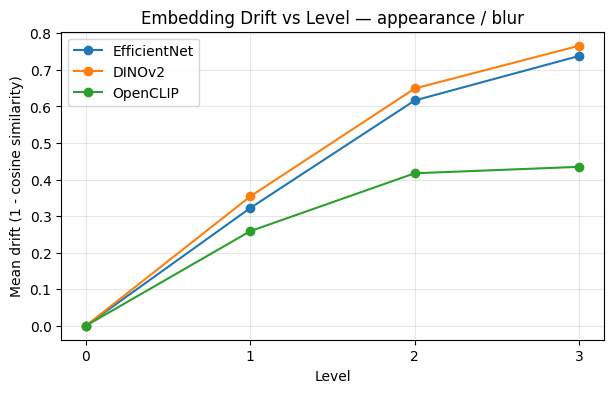

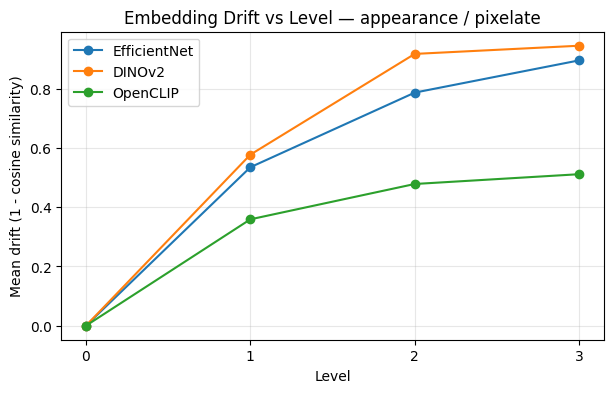

In [6]:
plot_drift("appearance", "blur")
plot_drift("appearance", "pixelate")

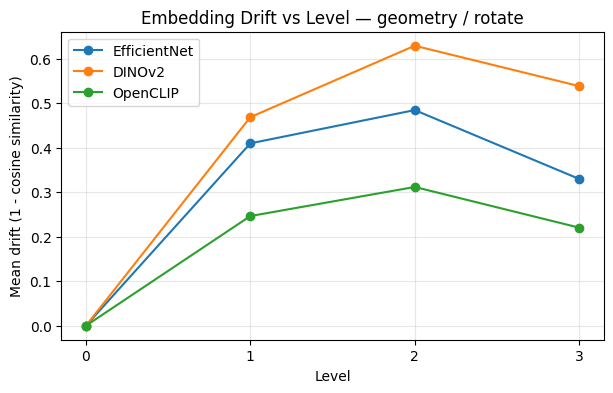

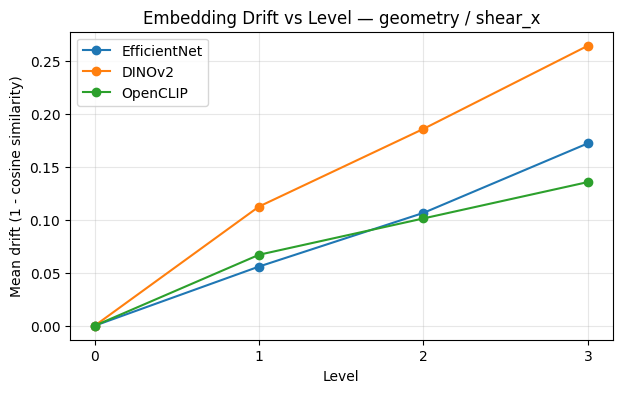

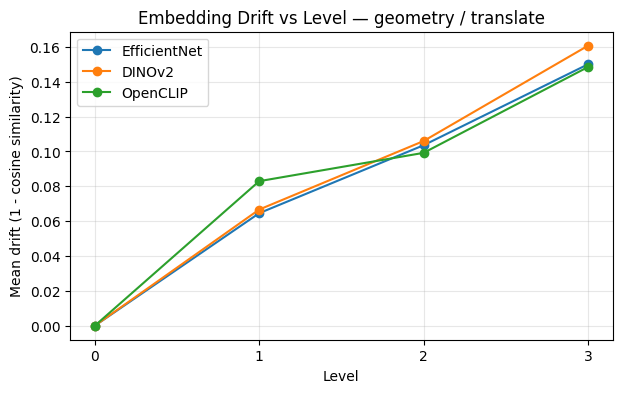

In [7]:
for t in ["rotate", "shear_x", "translate"]:
    plot_drift("geometry", t)

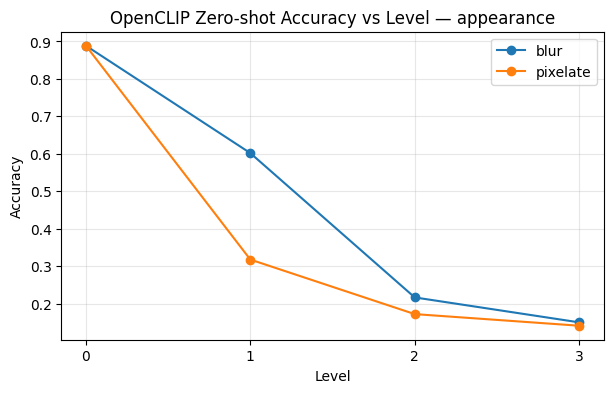

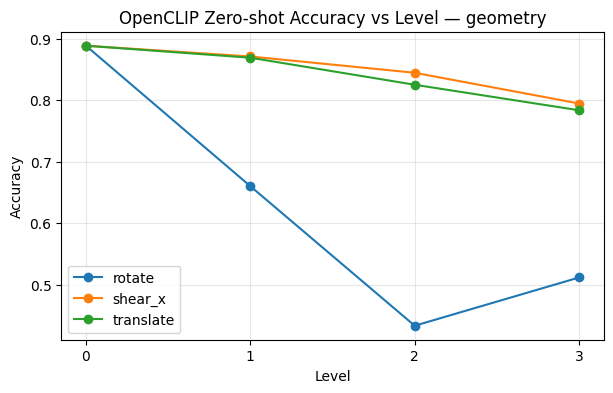

In [8]:
def plot_openclip_accuracy(axis: str):
    df = dfs["sum_app_clip"] if axis == "appearance" else dfs["sum_geo_clip"]
    plt.figure(figsize=(7,4))
    for t in sorted(df["transform"].unique()):
        d = df[df["transform"] == t].sort_values("level")
        plt.plot(d["level"], d["accuracy"], marker="o", label=t)

    plt.title(f"OpenCLIP Zero-shot Accuracy vs Level — {axis}")
    plt.xlabel("Level")
    plt.ylabel("Accuracy")
    plt.xticks(sorted(df["level"].unique()))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

plot_openclip_accuracy("appearance")
plot_openclip_accuracy("geometry")

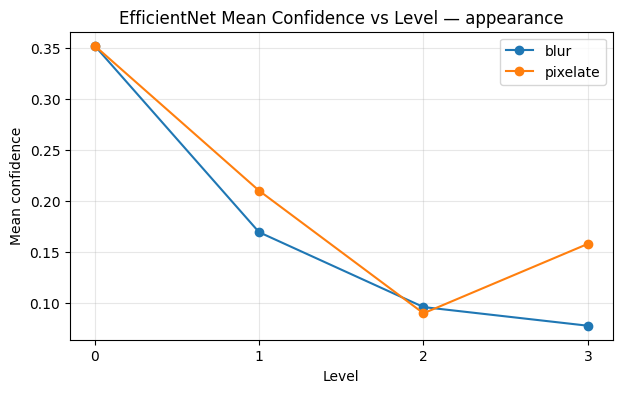

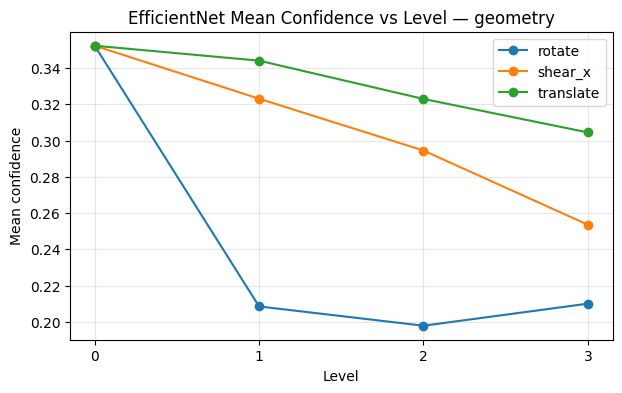

In [9]:
def plot_effnet_conf(axis: str):
    df = dfs["sum_app_eff"] if axis == "appearance" else dfs["sum_geo_eff"]
    plt.figure(figsize=(7,4))
    for t in sorted(df["transform"].unique()):
        d = df[df["transform"] == t].sort_values("level")
        plt.plot(d["level"], d["mean_confidence"], marker="o", label=t)

    plt.title(f"EfficientNet Mean Confidence vs Level — {axis}")
    plt.xlabel("Level")
    plt.ylabel("Mean confidence")
    plt.xticks(sorted(df["level"].unique()))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

plot_effnet_conf("appearance")
plot_effnet_conf("geometry")

In [10]:
# Appearance drift @ L3
def drift_at_level(df, level=3):
    d = df[df["level"] == level].copy()
    cols = [c for c in ["model","axis","transform","level","mean_cosine_similarity","mean_drift","n"] if c in d.columns]
    return d[cols].sort_values(["transform"] + (["model"] if "model" in d.columns else []))

print("EfficientNet (appearance) drift @L3")
display(drift_at_level(dfs["drift_eff_app"], 3))

print("DINO (appearance) drift @L3")
display(drift_at_level(dfs["drift_dino_app"], 3))

print("OpenCLIP (appearance) drift @L3")
display(drift_at_level(dfs["drift_clip_app"], 3))

EfficientNet (appearance) drift @L3


,model,axis,transform,level,mean_cosine_similarity,mean_drift,n
3,efficientnet_v2_s,appearance,blur,3,0.261893,0.738107,2000
7,efficientnet_v2_s,appearance,pixelate,3,0.103973,0.896027,2000


DINO (appearance) drift @L3


,model,axis,transform,level,mean_cosine_similarity,mean_drift,n
3,dinov2_vits14,appearance,blur,3,0.233896,0.766104,2000
7,dinov2_vits14,appearance,pixelate,3,0.054494,0.945506,2000


OpenCLIP (appearance) drift @L3


,axis,transform,level,mean_cosine_similarity,mean_drift,n
3,appearance,blur,3,0.565264,0.434736,2000
7,appearance,pixelate,3,0.488340,0.511660,2000


In [13]:
# EXPORT EVERYTHING (tables + figures) to results_n2000/report/
# Run this as the last cell.

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

OUT_DIR = RESULTS / "report"
PLOTS_DIR = OUT_DIR / "plots"
OUT_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("Writing report to:", OUT_DIR.resolve())

# -----------------------------
# 1) Write key tables (CSV copies)
# -----------------------------
tables_to_export = [
    "fail_app_eff","fail_geo_eff","fail_app_clip","fail_geo_clip",
    "sum_app_eff","sum_geo_eff","sum_app_clip","sum_geo_clip",
    "drift_eff_app","drift_eff_geo","drift_clip_app","drift_clip_geo","drift_dino_app","drift_dino_geo",
]

for k in tables_to_export:
    if k in dfs:
        out_path = OUT_DIR / f"{k}.csv"
        dfs[k].to_csv(out_path, index=False)

print("Exported tables:", [f"{k}.csv" for k in tables_to_export if k in dfs])

# -----------------------------
# 2) Build a Markdown appendix (advisor-friendly)
# -----------------------------
def df_to_md(df: pd.DataFrame, max_rows=50) -> str:
    if len(df) > max_rows:
        df = df.head(max_rows)
    return df.to_markdown(index=False)

appendix_path = OUT_DIR / "stats_appendix.md"
with appendix_path.open("w", encoding="utf-8") as f:
    f.write("# Stats Appendix (n=2000)\n\n")
    f.write("This appendix is auto-generated from CSV outputs in `results_n2000/`.\n\n")

    f.write("## Failure levels (50% drop rule)\n\n")
    for title, key in [
        ("EfficientNet — Appearance", "fail_app_eff"),
        ("EfficientNet — Geometry", "fail_geo_eff"),
        ("OpenCLIP — Appearance", "fail_app_clip"),
        ("OpenCLIP — Geometry", "fail_geo_clip"),
    ]:
        if key in dfs:
            f.write(f"### {title}\n\n")
            f.write(df_to_md(dfs[key]) + "\n\n")

    f.write("## Behavioral summaries\n\n")
    for title, key in [
        ("EfficientNet — Appearance (mean confidence)", "sum_app_eff"),
        ("EfficientNet — Geometry (mean confidence)", "sum_geo_eff"),
        ("OpenCLIP — Appearance (accuracy + mean confidence)", "sum_app_clip"),
        ("OpenCLIP — Geometry (accuracy + mean confidence)", "sum_geo_clip"),
    ]:
        if key in dfs:
            f.write(f"### {title}\n\n")
            f.write(df_to_md(dfs[key], max_rows=200) + "\n\n")

    f.write("## Embedding drift summaries\n\n")
    for title, key in [
        ("EfficientNet — Appearance", "drift_eff_app"),
        ("EfficientNet — Geometry", "drift_eff_geo"),
        ("OpenCLIP — Appearance", "drift_clip_app"),
        ("OpenCLIP — Geometry", "drift_clip_geo"),
        ("DINOv2 — Appearance", "drift_dino_app"),
        ("DINOv2 — Geometry", "drift_dino_geo"),
    ]:
        if key in dfs:
            f.write(f"### {title}\n\n")
            f.write(df_to_md(dfs[key], max_rows=200) + "\n\n")

print("Wrote:", appendix_path.resolve())

# -----------------------------
# 3) Save plots as PNGs
# (We recreate plots and save them deterministically)
# -----------------------------

def save_drift_plot(axis: str, transform: str, filename: str, level_max=3):
    if axis == "appearance":
        eff = dfs["drift_eff_app"].copy()
        clip = dfs["drift_clip_app"].copy()
        dino = dfs["drift_dino_app"].copy()
    else:
        eff = dfs["drift_eff_geo"].copy()
        clip = dfs["drift_clip_geo"].copy()
        dino = dfs["drift_dino_geo"].copy()

    # Some drift dfs may or may not have model column; standardize
    if "model" not in clip.columns:
        clip = clip.copy()
        clip["model"] = "openclip_vit_b_32"

    eff_t = eff[(eff["transform"] == transform) & (eff["level"] <= level_max)].sort_values("level")
    clip_t = clip[(clip["transform"] == transform) & (clip["level"] <= level_max)].sort_values("level")
    dino_t = dino[(dino["transform"] == transform) & (dino["level"] <= level_max)].sort_values("level")

    plt.figure(figsize=(7,4))
    plt.plot(eff_t["level"], eff_t["mean_drift"], marker="o", label="EfficientNet")
    plt.plot(dino_t["level"], dino_t["mean_drift"], marker="o", label="DINOv2")
    plt.plot(clip_t["level"], clip_t["mean_drift"], marker="o", label="OpenCLIP")
    plt.title(f"Embedding Drift vs Level — {axis} / {transform}")
    plt.xlabel("Level")
    plt.ylabel("Mean drift (1 - cosine similarity)")
    plt.xticks(range(0, level_max+1))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    out = PLOTS_DIR / filename
    plt.savefig(out, dpi=200)
    plt.close()
    return out

def save_openclip_accuracy(axis: str, filename: str):
    df = dfs["sum_app_clip"] if axis == "appearance" else dfs["sum_geo_clip"]
    plt.figure(figsize=(7,4))
    for t in sorted(df["transform"].unique()):
        d = df[df["transform"] == t].sort_values("level")
        plt.plot(d["level"], d["accuracy"], marker="o", label=t)
    plt.title(f"OpenCLIP Zero-shot Accuracy vs Level — {axis}")
    plt.xlabel("Level")
    plt.ylabel("Accuracy")
    plt.xticks(sorted(df["level"].unique()))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    out = PLOTS_DIR / filename
    plt.savefig(out, dpi=200)
    plt.close()
    return out

def save_effnet_conf(axis: str, filename: str):
    df = dfs["sum_app_eff"] if axis == "appearance" else dfs["sum_geo_eff"]
    plt.figure(figsize=(7,4))
    for t in sorted(df["transform"].unique()):
        d = df[df["transform"] == t].sort_values("level")
        plt.plot(d["level"], d["mean_confidence"], marker="o", label=t)
    plt.title(f"EfficientNet Mean Confidence vs Level — {axis}")
    plt.xlabel("Level")
    plt.ylabel("Mean confidence")
    plt.xticks(sorted(df["level"].unique()))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    out = PLOTS_DIR / filename
    plt.savefig(out, dpi=200)
    plt.close()
    return out

saved = []

# Drift plots
saved.append(save_drift_plot("appearance", "blur", "drift_appearance_blur.png"))
saved.append(save_drift_plot("appearance", "pixelate", "drift_appearance_pixelate.png"))

for t in ["rotate", "shear_x", "translate"]:
    saved.append(save_drift_plot("geometry", t, f"drift_geometry_{t}.png"))

# Behavioral plots
saved.append(save_openclip_accuracy("appearance", "openclip_accuracy_appearance.png"))
saved.append(save_openclip_accuracy("geometry", "openclip_accuracy_geometry.png"))
saved.append(save_effnet_conf("appearance", "effnet_confidence_appearance.png"))
saved.append(save_effnet_conf("geometry", "effnet_confidence_geometry.png"))

print("Saved plots:")
for p in saved:
    print(" -", p.resolve())

# -----------------------------
# 4) Quick index file
# -----------------------------
index_path = OUT_DIR / "README.txt"
with index_path.open("w", encoding="utf-8") as f:
    f.write("Report outputs\n")
    f.write("=============\n\n")
    f.write("Tables: .csv copies under this folder\n")
    f.write("Stats appendix: stats_appendix.md\n")
    f.write("Plots: report/plots/*.png\n\n")
    f.write("Key plots:\n")
    for p in saved:
        f.write(f"- {p.relative_to(OUT_DIR)}\n")

print("Wrote:", index_path.resolve())

Writing report to: C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000\report
Exported tables: ['fail_app_eff.csv', 'fail_geo_eff.csv', 'fail_app_clip.csv', 'fail_geo_clip.csv', 'sum_app_eff.csv', 'sum_geo_eff.csv', 'sum_app_clip.csv', 'sum_geo_clip.csv', 'drift_eff_app.csv', 'drift_eff_geo.csv', 'drift_clip_app.csv', 'drift_clip_geo.csv', 'drift_dino_app.csv', 'drift_dino_geo.csv']
Wrote: C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000\report\stats_appendix.md
Saved plots:
 - C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000\report\plots\drift_appearance_blur.png
 - C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000\report\plots\drift_appearance_pixelate.png
 - C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\results_n2000\report\plots\drift_geometry_rotate.png
 - C:\Users\Melvi\Downloads\research_seminar\vision_abstraction_project\resu